In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

do = pd.read_csv('./data/lucas_preprocessed_v20251113.csv')
df = pd.read_csv('./eval/04a_hybridBD_cv.pred.csv')


print(df.shape)
target_names = ['SOCconc','CF','BD','SOCdensity']
scalers = {'SOCconc':0.153,'CF':0.263,'BD':0.529,'SOCdensity':0.167}

# for tgt in target_names
#     # println(tgt, "------------")
#     # println(minimum(df[:,tgt]), "  ", maximum(df[:,tgt]))
#     if tgt in (:SOCdensity, :SOCconc)
#         df[!, tgt] .= log.(df[!, tgt])
#         # println(minimum(df[:,tgt]), "  ", maximum(df[:,tgt]))
#     end
#     df[!, tgt] .= df[!, tgt] .* scalers[tgt]
#     # println(minimum(df[:,tgt]), "  ", maximum(df[:,tgt]))
# end

(61288, 388)


0.9944910908603316 0.151


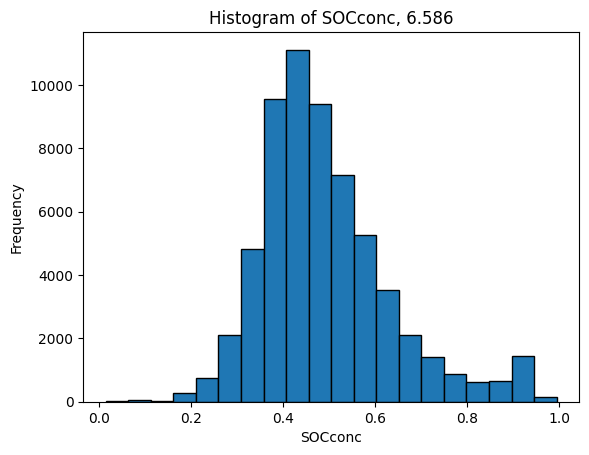

0.9970289700644367 0.263


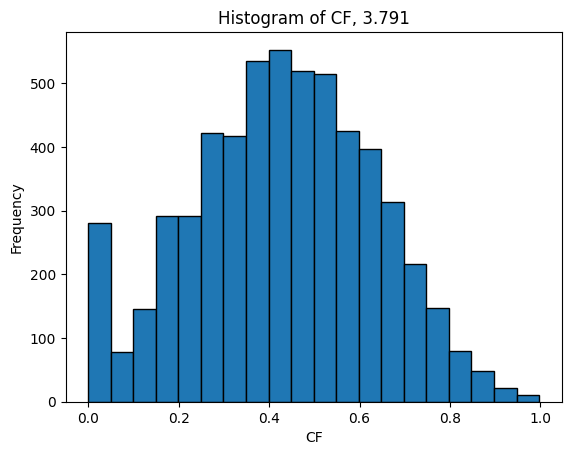

0.9982230000000001 0.529


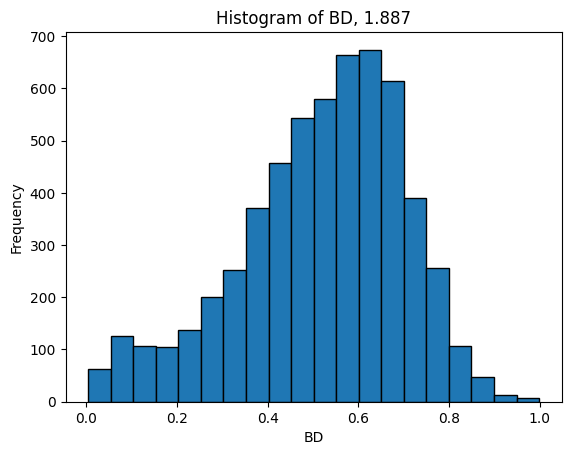

0.9998072570036676 0.167


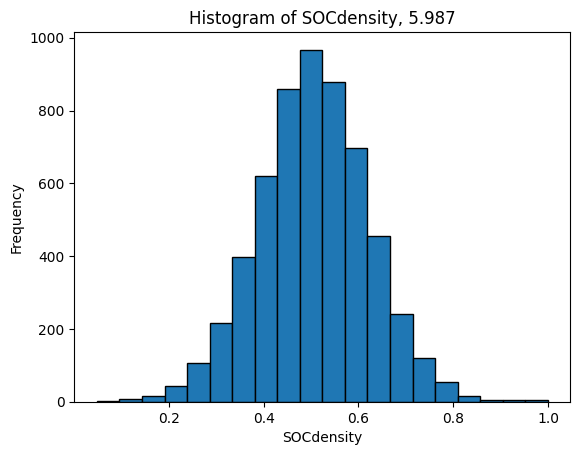

In [23]:
scalers = {'SOCconc':0.151,'CF':0.263,'BD':0.529,'SOCdensity':0.167}
for tgt in target_names:
    if tgt in ['SOCconc','CF']:
        yv = np.log1p(do[tgt].dropna())
    elif tgt=='SOCdensity':
        yv = np.log(do[tgt].dropna())
    else:
        yv = do[tgt].dropna()
        
    plt.figure()  # Create a new figure for each target
    mm = np.max(yv)
    ss = 1/mm
    sc = scalers.get(tgt)
    print(np.max(yv*sc), sc)
    plt.hist(yv*sc, bins=20, edgecolor='black')
    plt.title(f"Histogram of {tgt}, {mm:.3f}")
    plt.xlabel(tgt)
    plt.ylabel("Frequency")
    plt.show()


In [15]:
do = pd.read_csv('./data/lucas_preprocessed_v20251103.csv')

In [56]:
1/np.max(np.log1p(do['CF']*100))

0.26378370929683487

(array([ 358.,  437.,  714.,  953., 1073.,  940.,  710.,  365.,  128.,
          32.]),
 array([0.        , 0.0997029 , 0.19940579, 0.29910869, 0.39881159,
        0.49851449, 0.59821738, 0.69792028, 0.79762318, 0.89732607,
        0.99702897]),
 <BarContainer object of 10 artists>)

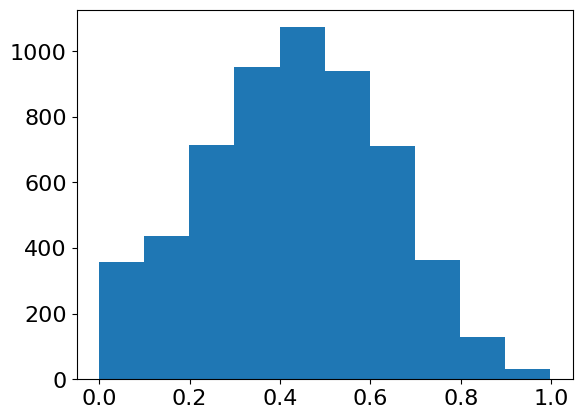

In [57]:
plt.hist(np.log1p(do['CF']*100)*0.263)


In [14]:
df.loc[df['SOCconc']<0]

,time,lat,lon,id,clay,bulk_density_tot,coarse_mass,ref,nuts0,ph_h2o,...,fapar_glad_landsat_ard2_seasconv_longterm_p25_30m_s_20000101_20221231_eu_epsg_3035_v20231218,ls_factor_bareearth_ensemble_m_480m_s_20000101_20221231_eu_epsg_3035_v20240501,SOCdensity,row_id,pred_BD,pred_SOCconc,pred_CF,pred_SOCdensity,pred_oBD,pred_mBD
4851,2015,40.285270,-3.072460,32102006,6.0,NaN,NaN,LUCAS,ES,7.68,...,-1.700285,-0.214532,NaN,24085,0.528302,0.360787,0.116654,0.370395,0.188578,1.098915
4912,2015,42.931430,-3.381070,32322300,26.0,NaN,NaN,LUCAS,ES,8.06,...,0.008537,0.329267,NaN,24336,0.514539,0.549833,0.200209,0.556707,0.188578,1.322416
5135,2015,41.722450,-1.507450,33642142,34.0,NaN,NaN,LUCAS,ES,8.29,...,-1.700285,0.342530,NaN,25425,0.633966,0.346683,0.187194,0.380067,0.188578,1.333685
5459,2015,41.609620,1.121970,35802100,21.0,NaN,NaN,LUCAS,ES,8.29,...,-1.925130,-0.055372,NaN,27082,0.590418,0.396717,0.122199,0.425819,0.188578,1.274202
7470,2015,69.516980,25.873240,49425226,0.0,NaN,8.0,LUCAS,FI,6.02,...,-1.205626,15.834167,NaN,37199,0.611581,0.500683,0.039116,0.546671,0.188578,1.515371
8010,2015,52.197603,23.232140,52203314,6.0,NaN,NaN,LUCAS,PL,7.64,...,-0.576060,-0.320640,NaN,39771,0.628460,0.354974,0.135572,0.391464,0.188578,1.327581
18217,2015,52.191150,6.825660,41043236,4.0,NaN,NaN,LUCAS,NL,5.22,...,0.278351,-0.386956,NaN,29743,0.684573,0.415521,0.070634,0.473916,0.188014,1.543470
20450,2015,40.848074,22.254795,53542056,21.0,NaN,32.0,LUCAS,EL,8.32,...,-1.880161,0.117052,NaN,40834,0.581875,0.303389,0.115874,0.326453,0.188014,1.189065
20789,2015,35.070040,33.384910,64401660,14.0,NaN,14.0,LUCAS,CY,8.55,...,-1.790223,-0.373693,NaN,42657,0.567073,0.356913,0.103163,0.379100,0.188014,1.186065
28931,2015,37.021530,-6.148850,28841702,45.0,NaN,NaN,LUCAS,ES,8.04,...,-1.340533,-0.400220,NaN,21899,0.518577,0.418611,0.151919,0.424899,0.184392,1.120770


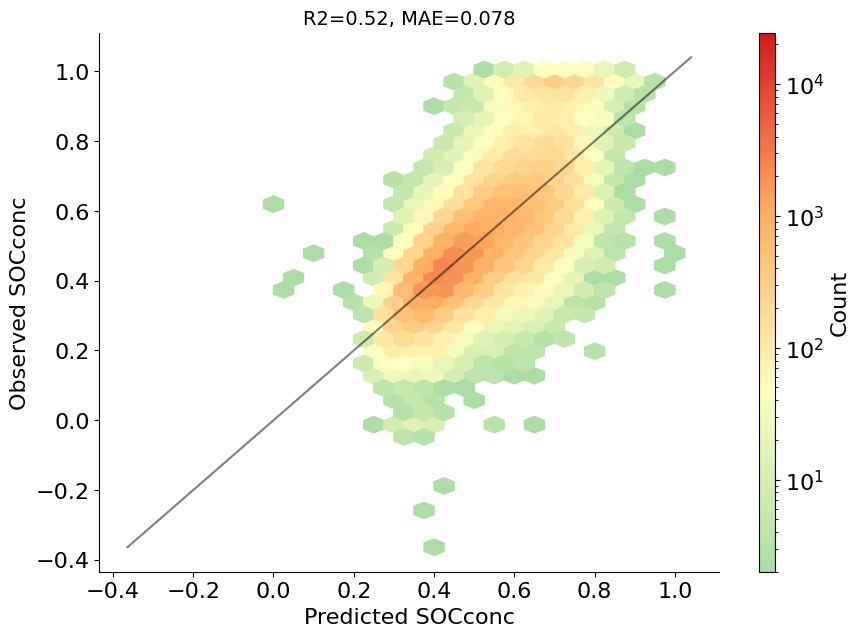

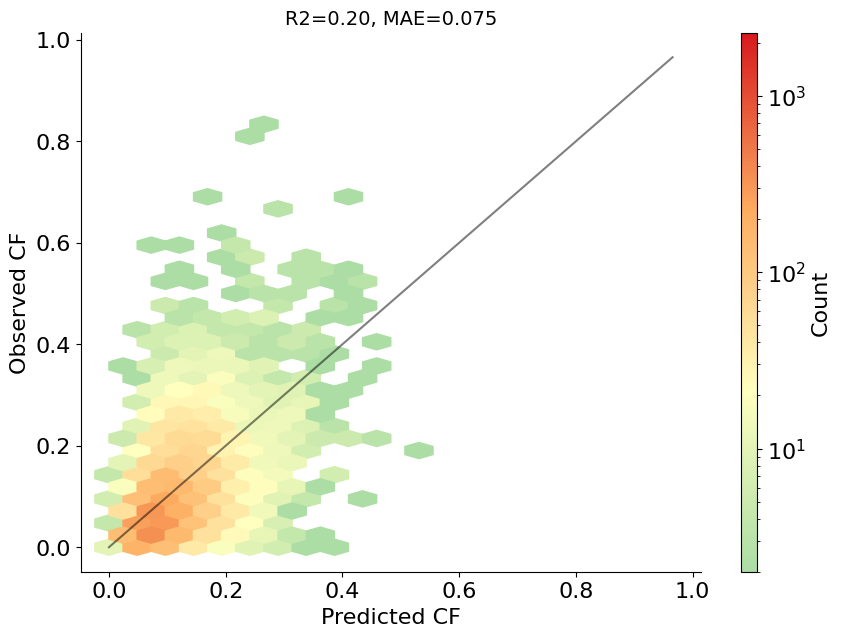

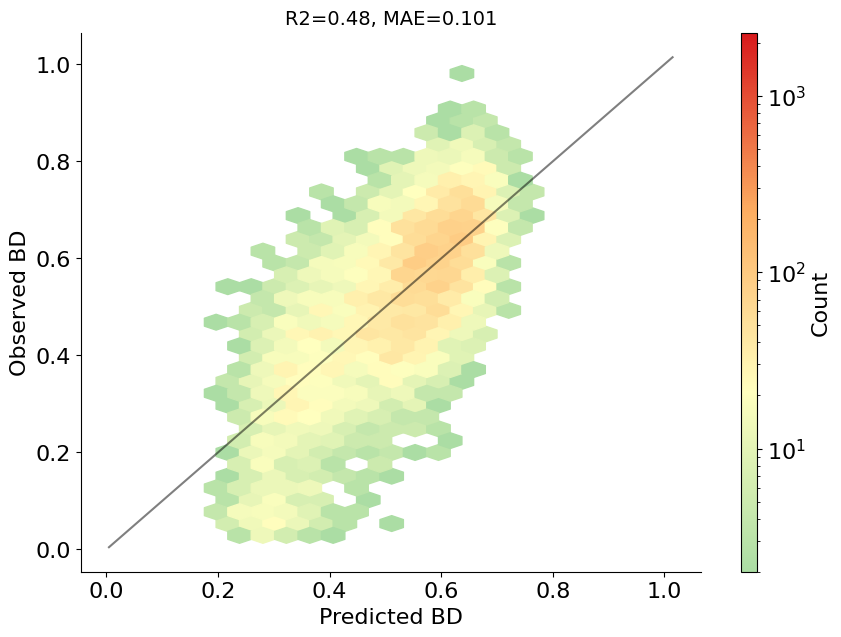

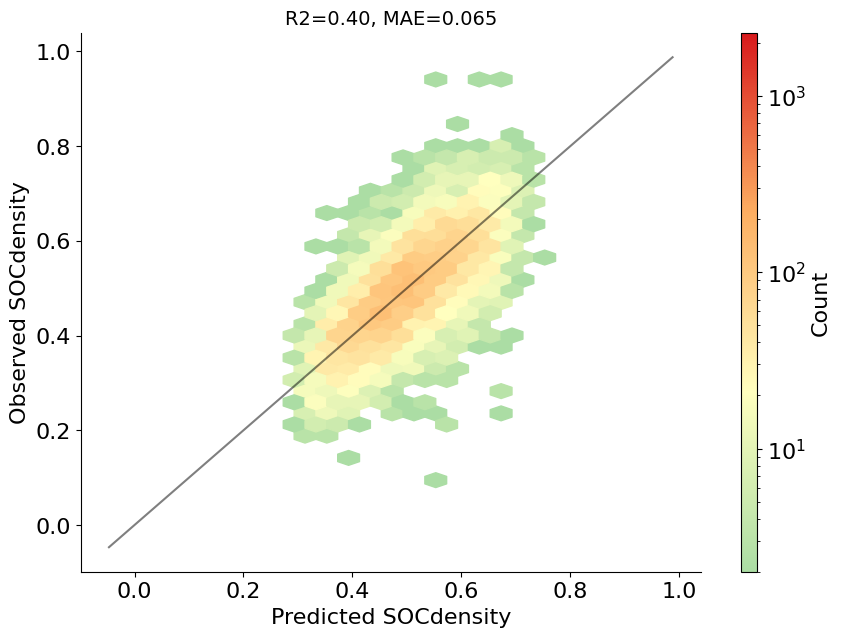

In [12]:
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

for tgt in target_names:
    y_all = df[tgt]
    yhat_all = df[f'pred_{tgt}']
    
    mask = y_all.notna() & yhat_all.notna()
    y_all = y_all[mask]
    yhat_all = yhat_all[mask]
    
    r2 = r2_score(y_all, yhat_all)
    mae = mean_absolute_error(y_all, yhat_all)

    cet_l19_cmap = LinearSegmentedColormap.from_list(
    "CET-L19", ["#abdda4", "#ffffbf", "#fdae61", "#d7191c"]
    )

    show_range = [
    np.min([y_all.min(), yhat_all.min()]),
    np.max([y_all.max(), yhat_all.max()])]
    vmax = 0.4 * len(y_all)

    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(8, 7))

    # ax.set_title(f'RMSE={rmse:.2f}, CCC={ccc:.2f}, bias={bias:.2f}')

    # Use the CET-L19 colorblind-friendly colormap
    hb = ax.hexbin(yhat_all, y_all, gridsize=(20, 20), cmap=cet_l19_cmap, mincnt=2, vmax=vmax, bins='log')
    ax.set_xlabel(f'Predicted {tgt}')
    ax.set_ylabel(f'Observed {tgt}')
    ax.set_aspect('auto', adjustable='box')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.plot(show_range, show_range, "-k", alpha=.5)

    ax.set_title(f'R2={r2:.2f}, MAE={mae:.3f}', fontsize=14)

    # Create a colorbar with proper spacing
    cax = fig.add_axes([ax.get_position().x1 + 0.05, ax.get_position().y0, 0.02, ax.get_position().height])
    cb = fig.colorbar(hb, cax=cax)
    cb.set_label('Count')

    # plt.tight_layout(rect=[0, 0, 0.92, 1])  # Adjust the right margin to make room for colorbar
    # plt.savefig(f'{data_path}/plot_{tgt}_benchmark_{version}.pdf', format='pdf', bbox_inches='tight', dpi=300)



<Axes: >

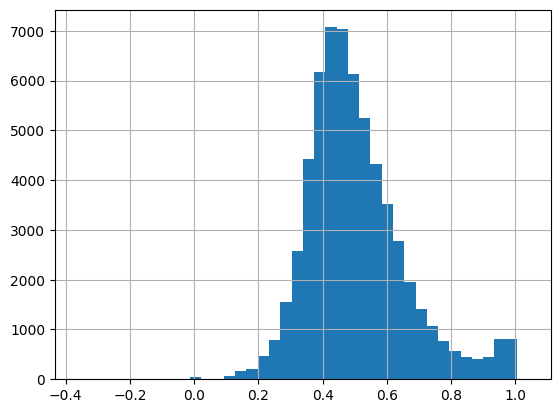

In [6]:
df['SOCconc'].hist(bins=40)